This notebook will pre-clean the data for data visualization, further understanding, and preprocessing.
The clean will consist of:
- filtering and dropping columns with over 50% NA values
- dropping columns that have constant values ONLY
- finding and operationalizing NA values
- removing columns with single unique values
- confirming data types between numerical and categorical data
- detecting and dropping duplicates and outliers

## 1. Import Libraries & Initialize Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, display
import math
import scipy.stats
import seaborn as sns
from tabulate import tabulate
from scipy import stats
from scipy.stats import mstats
from sklearn.base import TransformerMixin
import numpy.ma as ma
from prep import Prep
from na import NA

# changed display options to accomodate for long list in output
# pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_columns', 2000)

It was discovered in the previous notebook when getting to know the data -- my machine did not have the memory to compute the dataset all at once. While proceeding, the dataset will be preprocessed in chunks; using one chunk to test the code, and in general, used as a test chunk [sample] for the data.

In [2]:
# can load ~1/6 of dataset so will split into 3 chunks
n_chunks=6

# total num of rows in OG file
n_rows=sum(1 for row in open('train.csv')) -1 # subtract header row

chunk_size=n_rows // n_chunks

chunk = next(pd.read_csv('train.csv', chunksize=chunk_size, low_memory=False))
print(f'chunk shape - before : {chunk.shape}')

chunk shape - before : (24205, 1934)


## 2. Preprocess Parameters
This section involves quick and easy preprocessing steps that we know we have to do based on the information given in the data_understanding notebook:
- Detect NA values that are not in the standard detectable NA format (NaN, NA, nan) & change into the correct format.
- Drop columns with only one unique value. Ignore any NA values to truly find and drop the columns that only have one unique value.
- Deal with outliers
- Detect and drop duplicates if there are any

### 2.1 define parameters

In [3]:
# drop col with NA > than threshold (50%)
NA_thresh = 0.5
# outlier threshold
out_thresh=3

# define features
cat_col=chunk.select_dtypes(include='object').columns
time_col=['VAR_0073','VAR_0075','VAR_0156','VAR_0157',
          'VAR_0158','VAR_0159','VAR_0166','VAR_0167','VAR_0168','VAR_0169',
           'VAR_0176','VAR_0177','VAR_0178','VAR_0179','VAR_0204','VAR_0217','VAR_0314','VAR_0531']
num_col=chunk.select_dtypes(include=np.number).columns.difference(time_col)

### 2.2 pre-clean data

In [4]:
processor_ck=Prep(chunk,time_col)
prepped_ck=processor_ck.process_df()

print(f'Chunk shape - after: {prepped_ck.shape}')

Columns dropped: ['VAR_0404', 'VAR_0493', 'VAR_0073', 'VAR_0075', 'VAR_0156', 'VAR_0157', 'VAR_0158', 'VAR_0159', 'VAR_0166', 'VAR_0167', 'VAR_0168', 'VAR_0169', 'VAR_0176', 'VAR_0177', 'VAR_0178', 'VAR_0179', 'VAR_0204', 'VAR_0217', 'VAR_0314', 'VAR_0531']
df shape after dropping columns: (24205, 1914)


/home/itsavu/DATA.4380.Spring.2024/Homework/MarketingResponse/prep.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df = self.df.replace(['-1', '[]', ''], np.nan)


Operationalized NA values
Columns with a single unique value dropped: {'nonunique_col': {'VAR_0008': array([False], dtype=object), 'VAR_0009': array([False], dtype=object), 'VAR_0010': array([False], dtype=object), 'VAR_0011': array([False], dtype=object), 'VAR_0012': array([False], dtype=object), 'VAR_0018': array([0.]), 'VAR_0019': array([0.]), 'VAR_0020': array([0.]), 'VAR_0021': array([0.]), 'VAR_0022': array([0.]), 'VAR_0023': array([0.]), 'VAR_0024': array([0.]), 'VAR_0025': array([0.]), 'VAR_0026': array([0.]), 'VAR_0027': array([0.]), 'VAR_0028': array([0.]), 'VAR_0029': array([0.]), 'VAR_0030': array([0.]), 'VAR_0031': array([0.]), 'VAR_0032': array([0.]), 'VAR_0038': array([0.]), 'VAR_0039': array([0.]), 'VAR_0040': array([0.]), 'VAR_0041': array([0.]), 'VAR_0042': array([0.]), 'VAR_0043': array([False], dtype=object), 'VAR_0044': array([], dtype=float64), 'VAR_0106': array([0.]), 'VAR_0188': array([0.]), 'VAR_0189': array([0.]), 'VAR_0190': array([0.]), 'VAR_0191': array([0.

## 3. Missing Values
This section will deal with missing values and imputations

- Drop columns with over 50% NA values
- Impute columns based on dtype

In [5]:
# global variables 
cat_col=prepped_ck.select_dtypes(include='object').columns
num_col=prepped_ck.select_dtypes(include=np.number).columns.difference(time_col)

In [6]:
processor_ck=NA(prepped_ck,NA_thresh,num_col,cat_col)

# initial NA count
print(f'Number of NA - before: {np.any(prepped_ck.isnull())}')

# apply NA function
imputed_ck = processor_ck.process_na()

# post NA count
print(f'Number of NA - after: {np.any(imputed_ck.isnull())}')
print(f'Chunk shape - after: {imputed_ck.shape}')

Number of NA - before: True
High NA columns dropped: Index(['VAR_0074', 'VAR_0205', 'VAR_0206', 'VAR_0208', 'VAR_0209', 'VAR_0210',
       'VAR_0211', 'VAR_0467'],
      dtype='object')
df shape after dropping high NA columns: (24205, 1845)


/home/itsavu/DATA.4380.Spring.2024/Homework/MarketingResponse/na.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[col].fillna(self.df[col].mean(), inplace=True)


Numerical columns imputed
Categorical columns imputed
Number of NA - after: False
Chunk shape - after: (24205, 1845)


/home/itsavu/DATA.4380.Spring.2024/Homework/MarketingResponse/na.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[col].fillna(self.df[col].mode()[0], inplace=True)
/home/itsavu/DATA.4380.Spring.2024/Homework/MarketingResponse/na.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df[col].filln

## 4. Check Data Types
As said before in notebook, "data_understanding" some features categorized as numerical had a small number of unique values while having interesting ranges. Assumed that they may be survey answers from a likert scale. To confirm this guess, further visualization is needed for the full picture.

In [ ]:
table=[]

# iterate through each column in the first chunk
for col in imputed_ck.columns:
    # Skip the target column
    if col == 'target':
        continue
    
    properties = []
    
    # Determine the data type of the column
    data_type = 'Categorical' if imputed_ck[col].dtype == 'object' else 'Numerical'
    properties.append(col)
    properties.append(data_type)
    
    # Get the unique values or range of values depending on the data type
    if data_type == 'Categorical':
        values = imputed_ck[col].unique()
    else:
        values = f'{imputed_ck[col].min()} to {imputed_ck[col].max()}'
        
    properties.append(values)
    
    # Append the information to the table (list)
    table.append(properties)

# Convert table to HTML format
table_of_lists = [list(row) for row in table]

tabulate(table_of_lists, tablefmt='html', headers=['Features', 'Data Type', 'Values'])

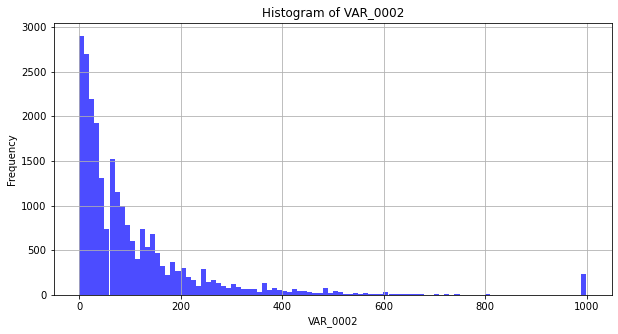

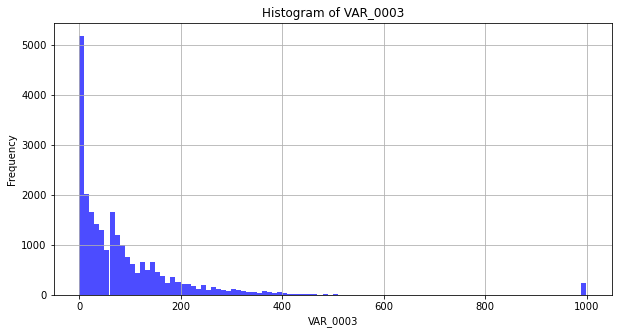

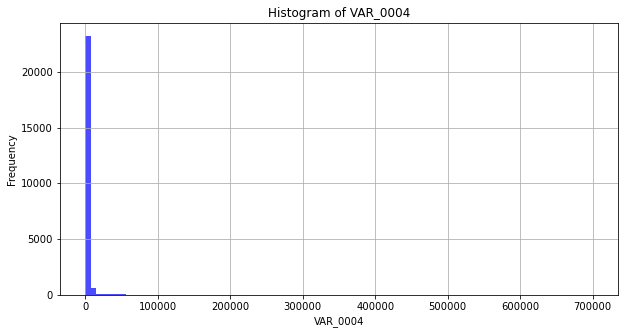

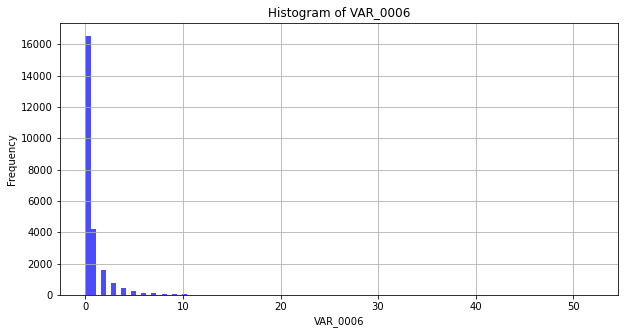

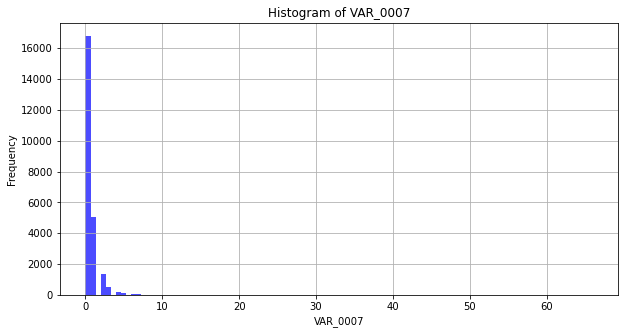

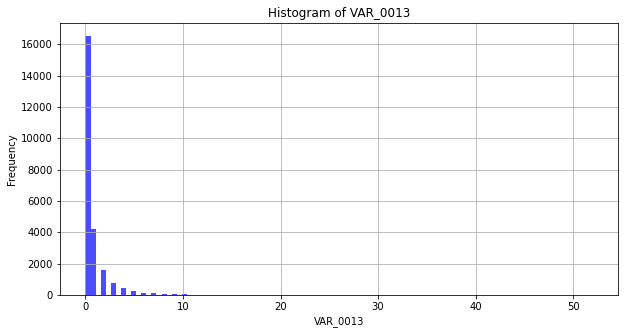

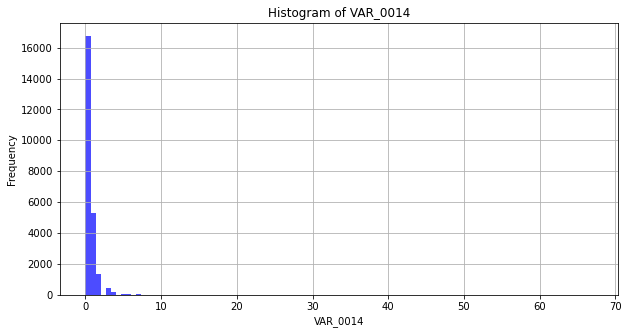

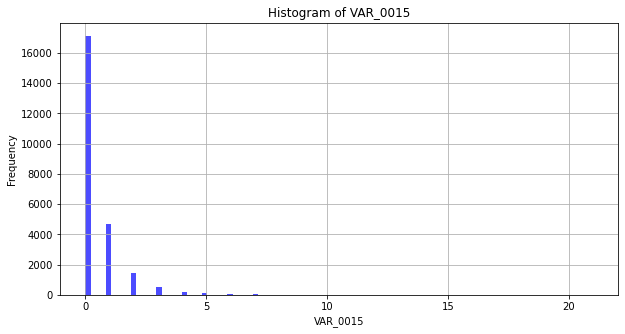

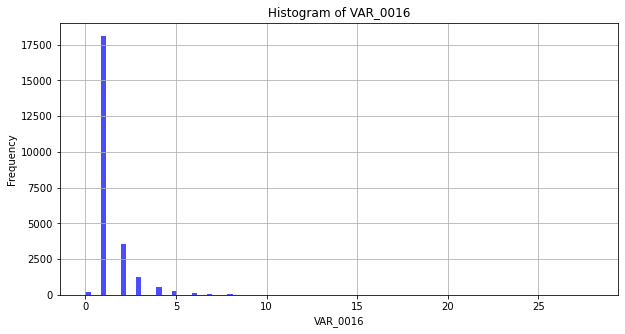

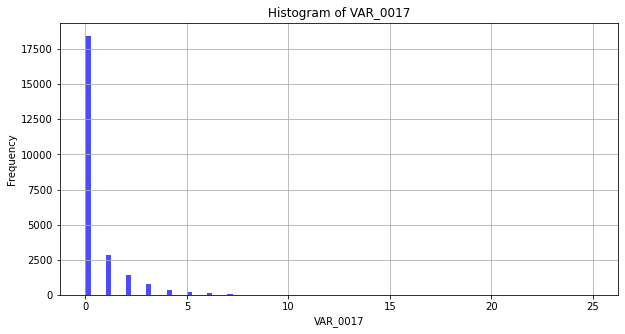

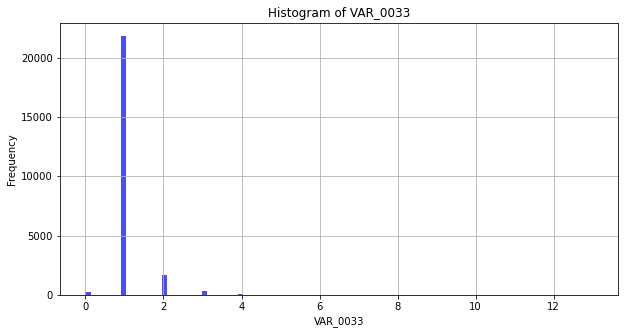

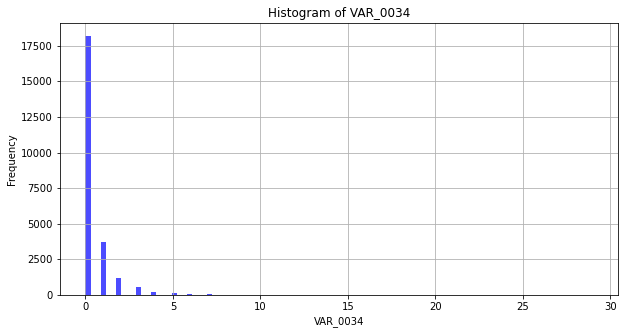

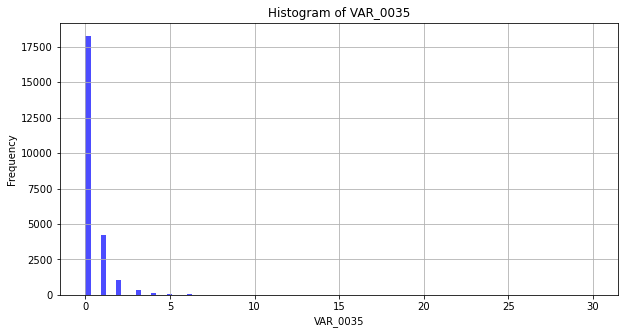

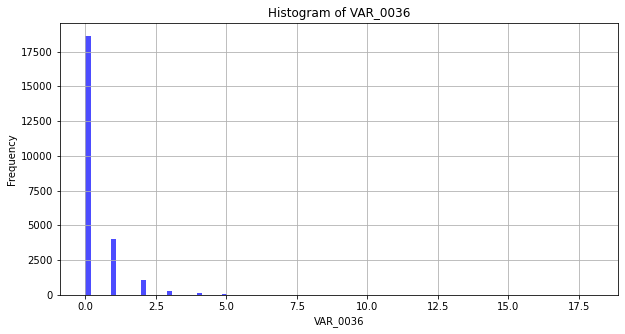

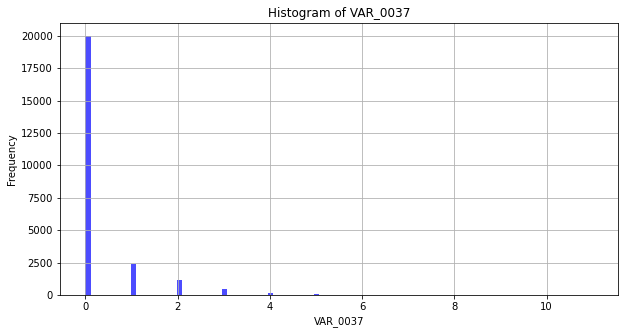

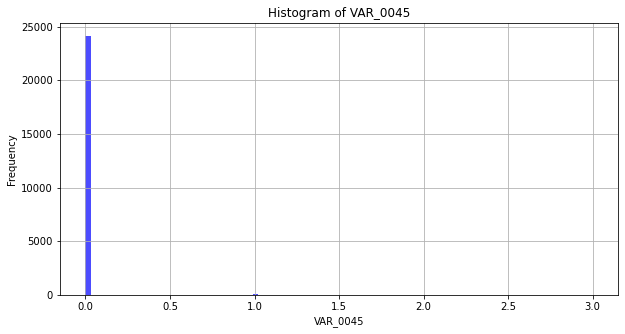

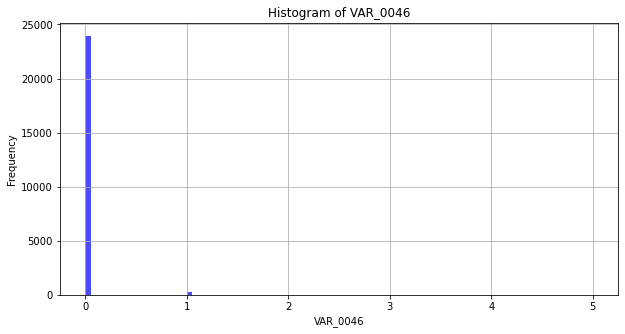

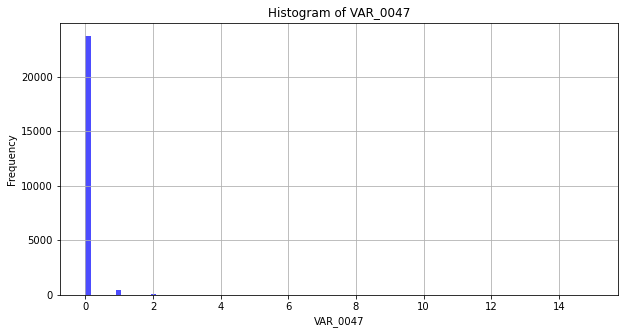

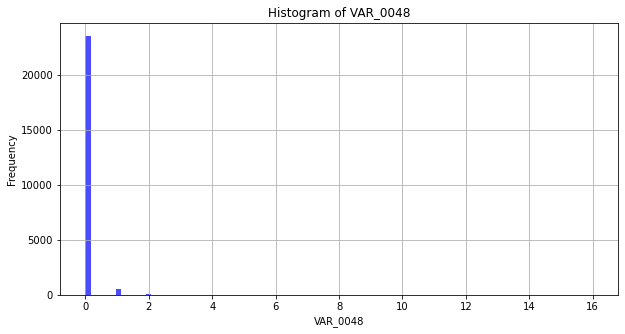

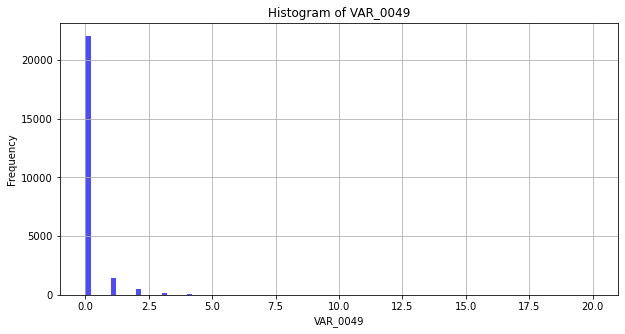

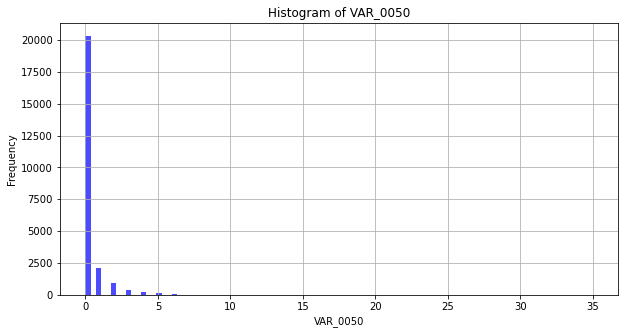

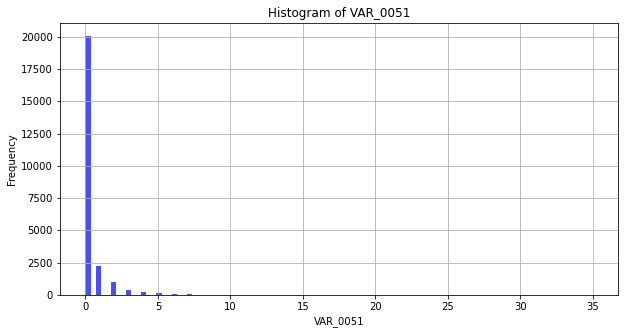

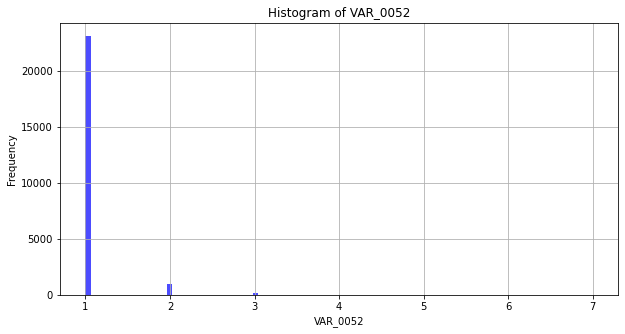

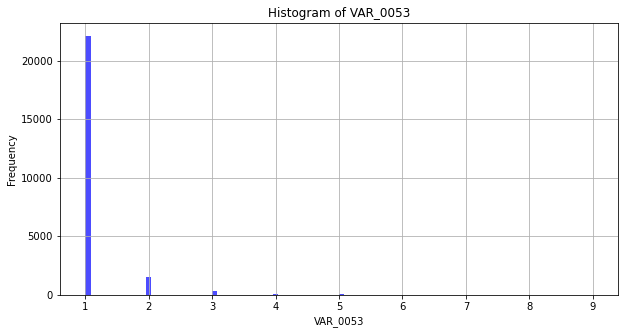

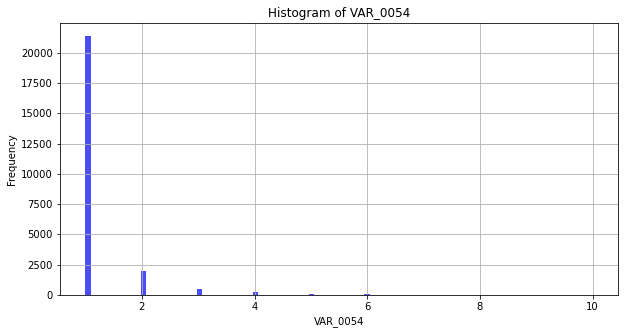

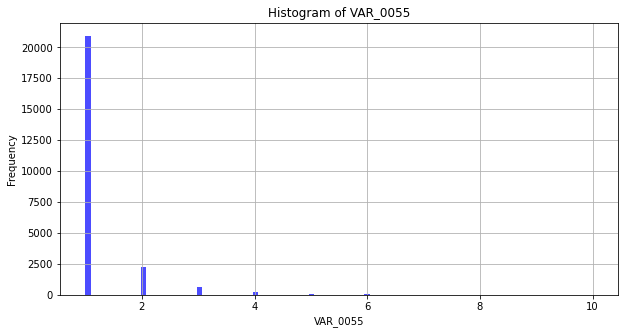

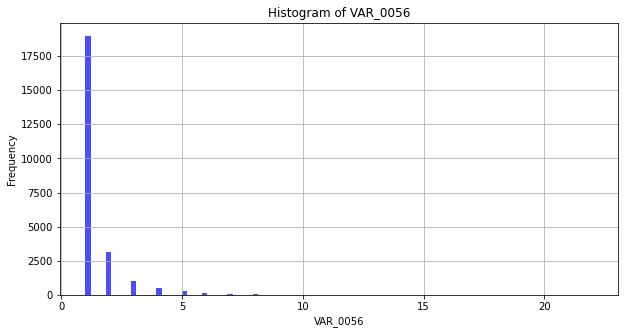

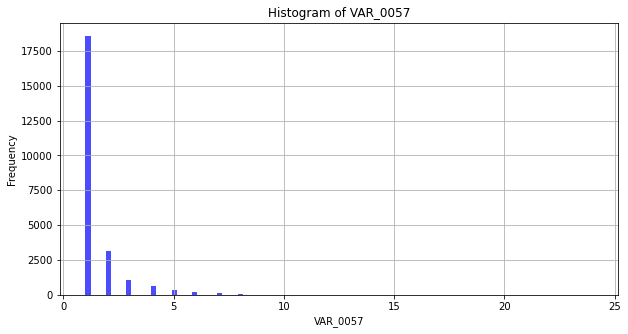

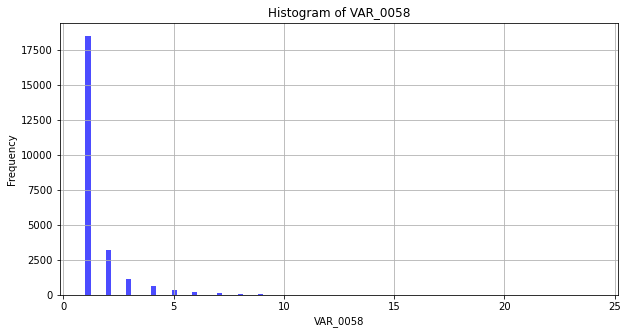

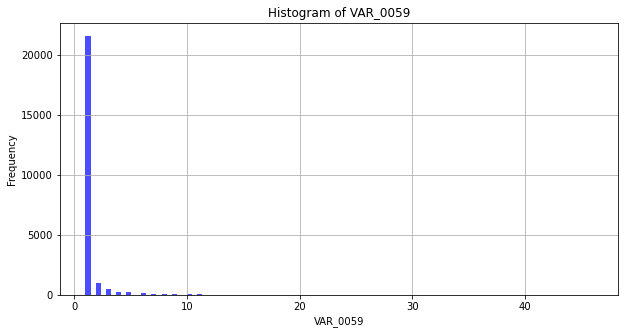

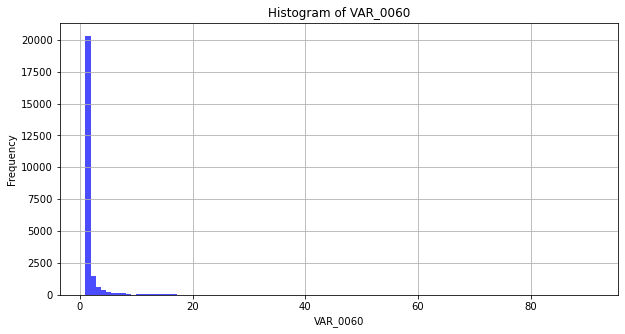

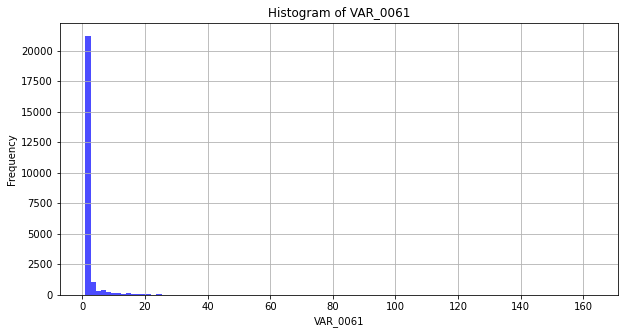

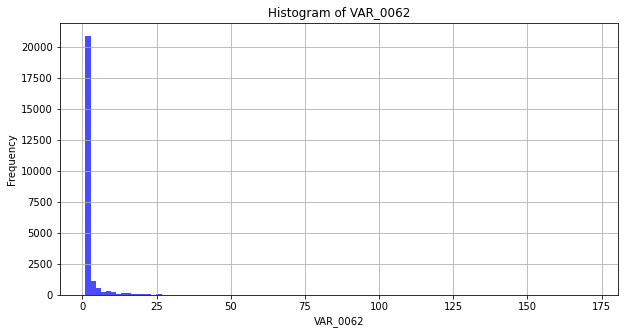

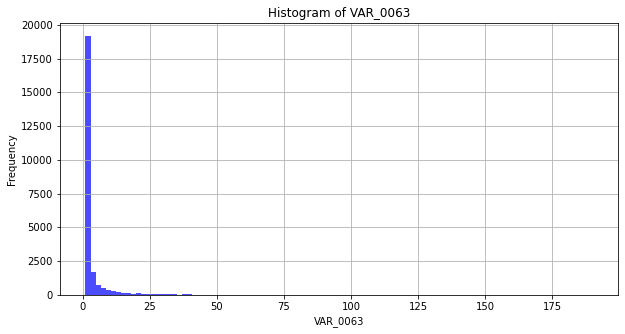

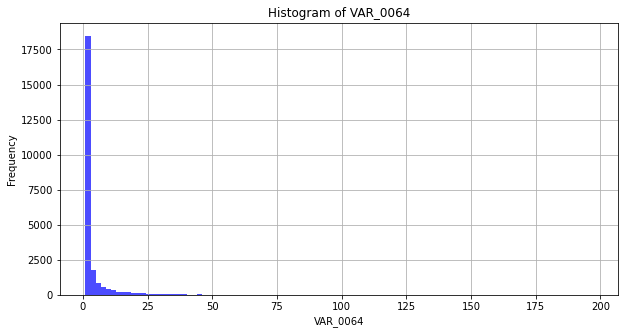

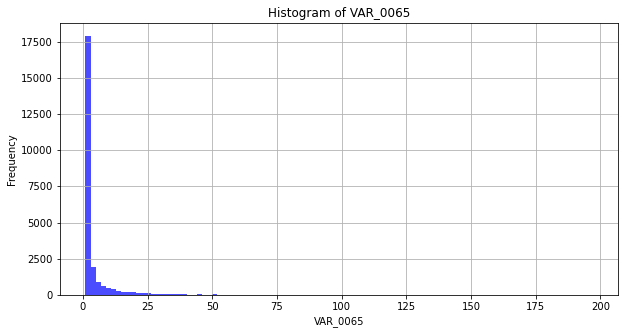

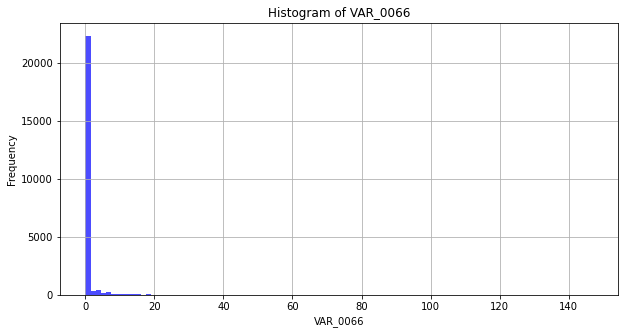

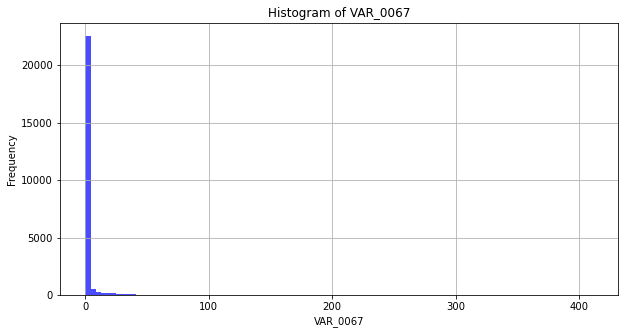

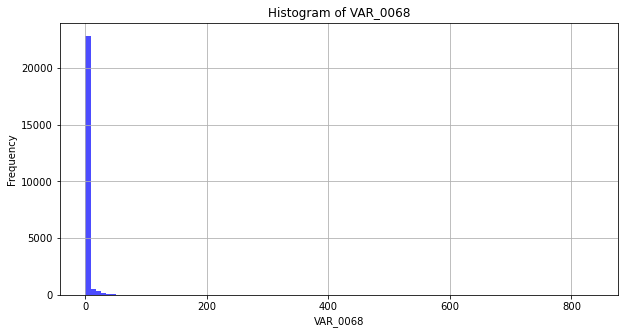

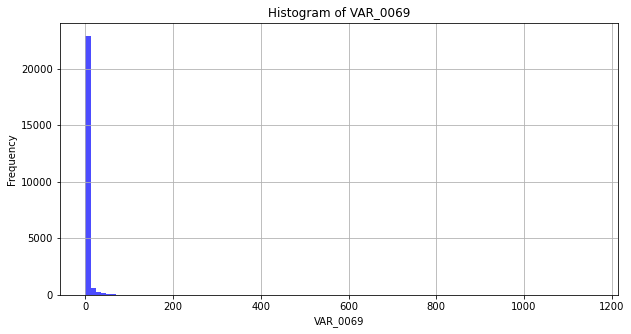

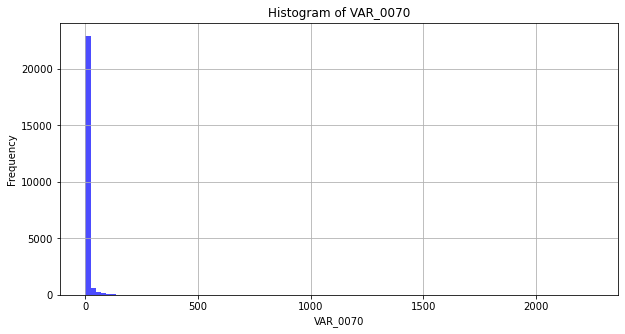

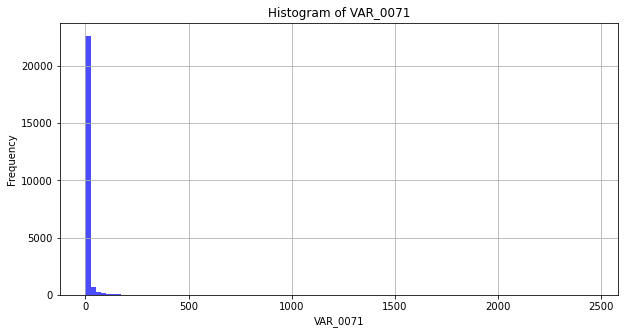

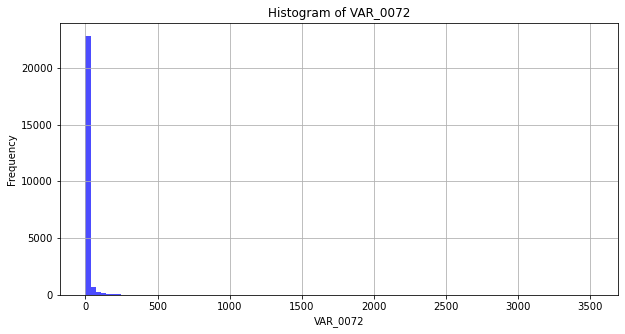

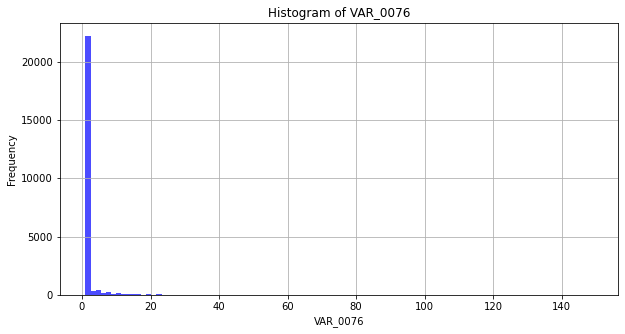

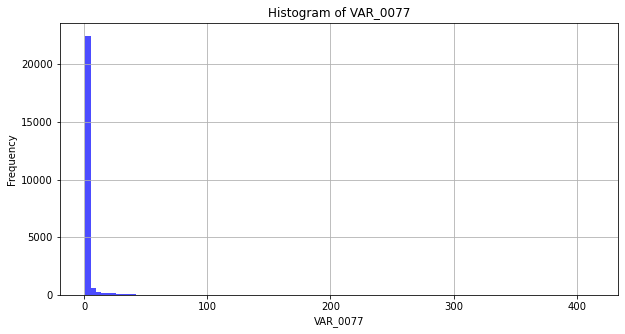

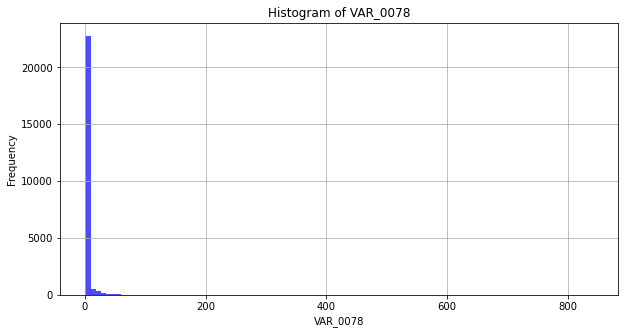

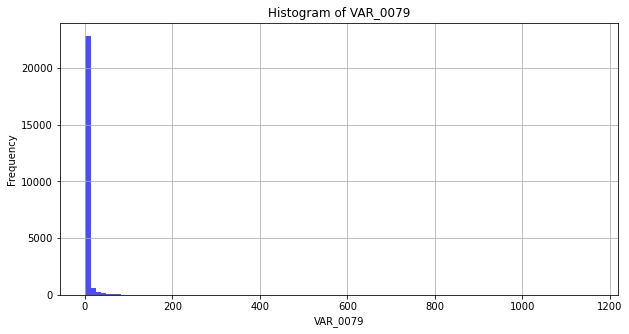

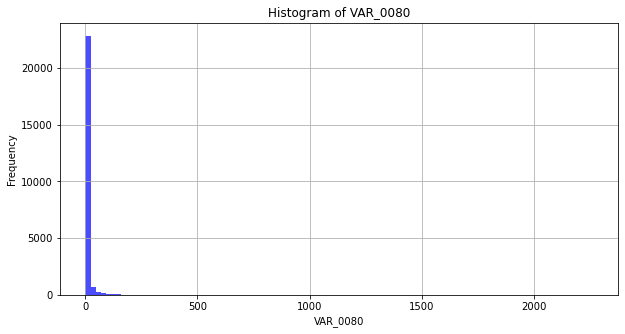

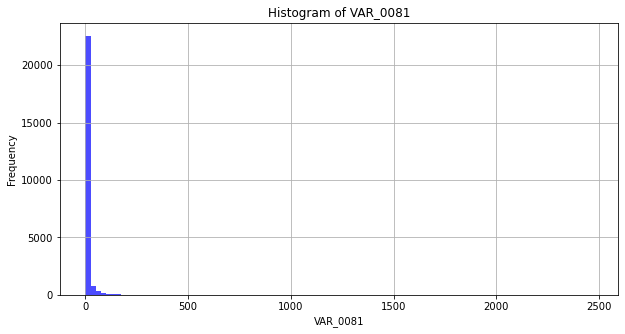

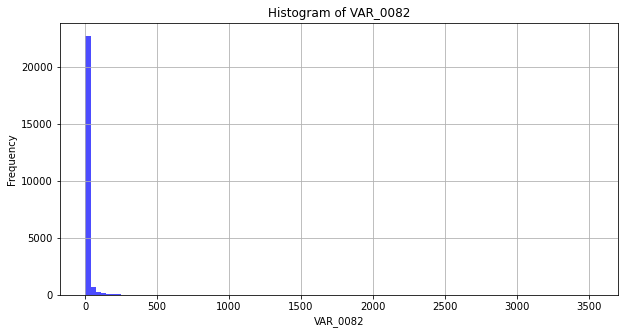

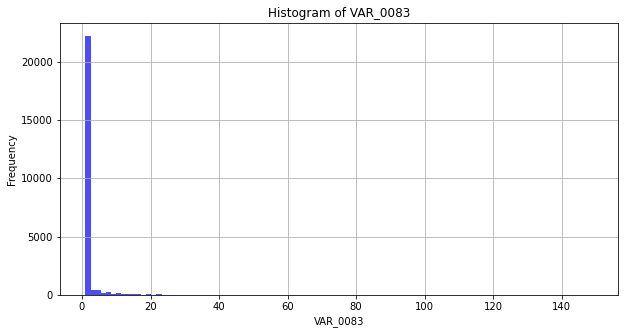

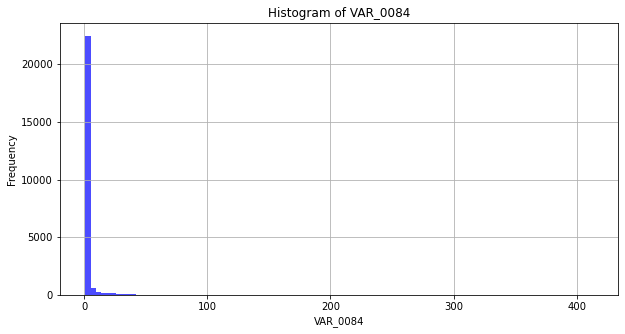

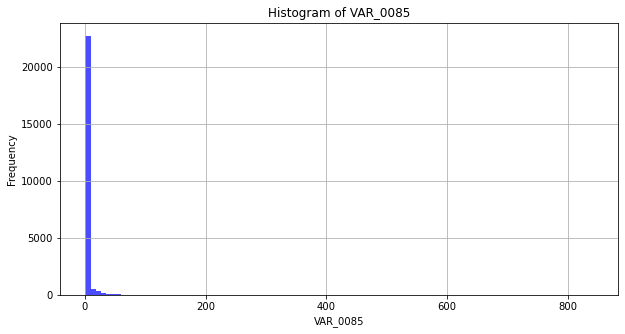

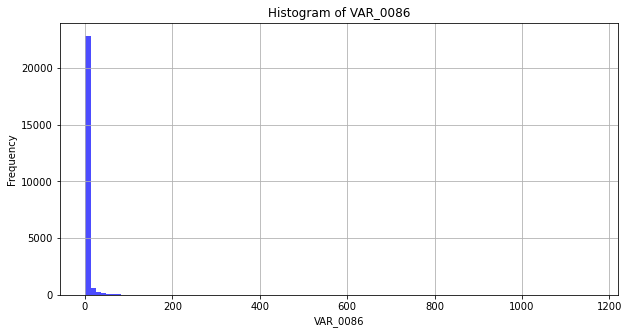

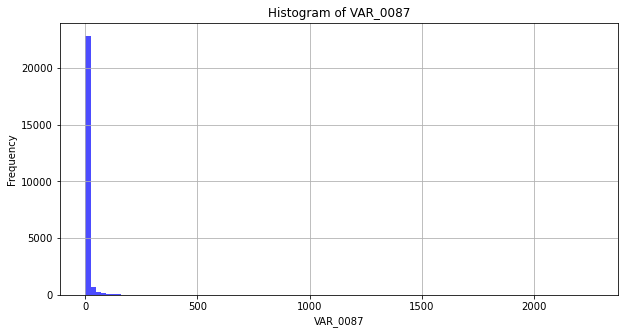

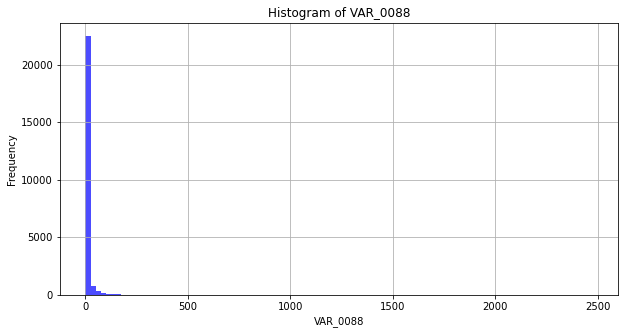

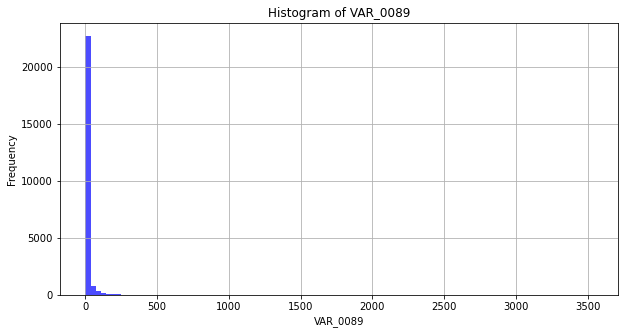

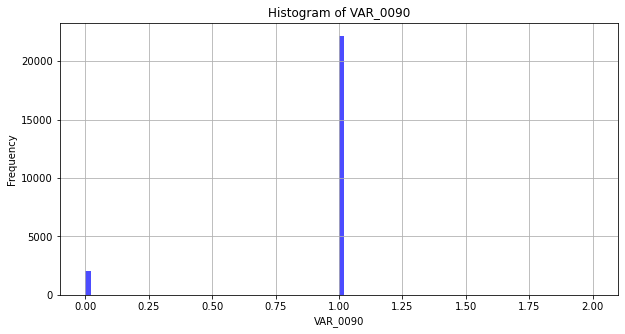

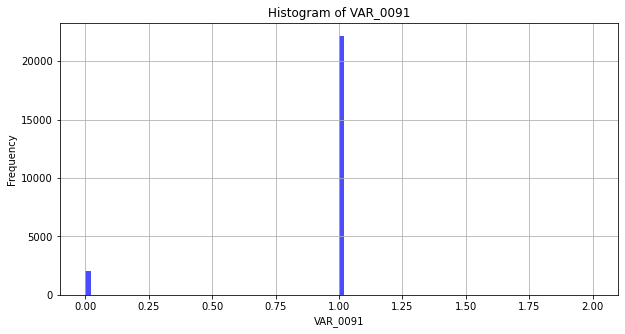

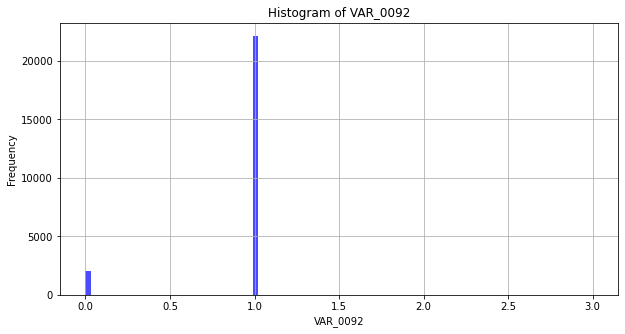

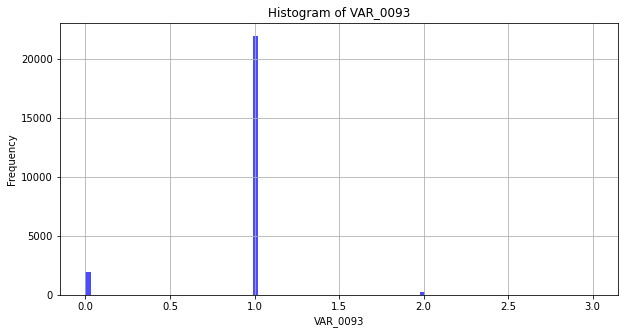

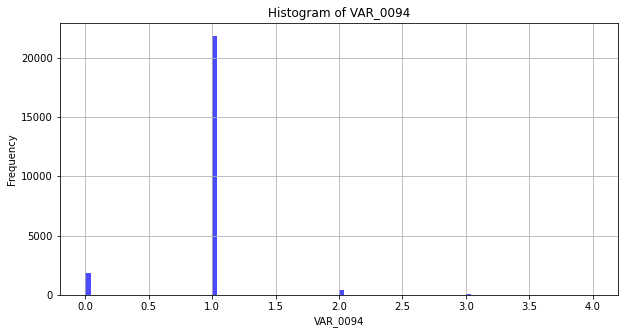

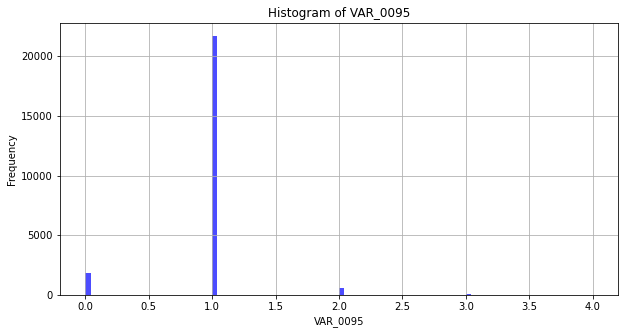

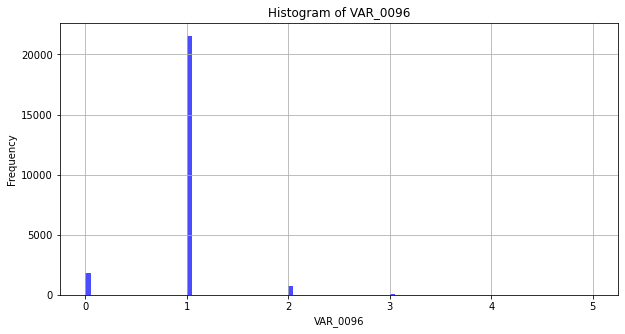

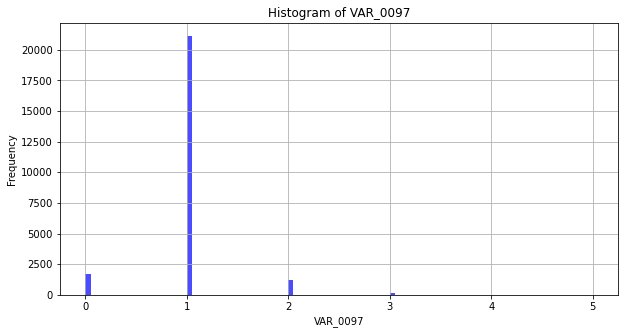

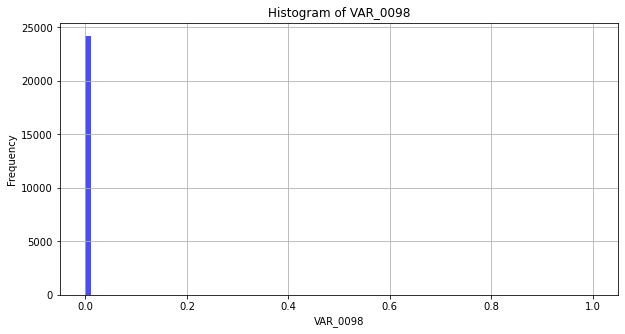

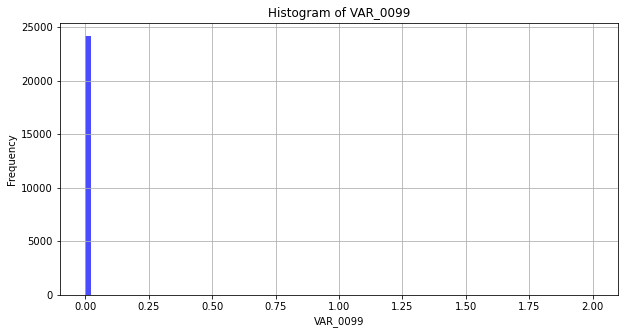

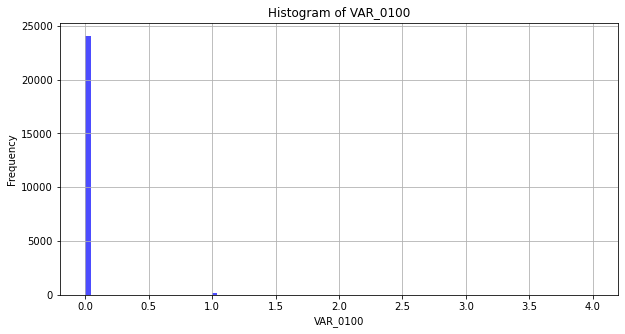

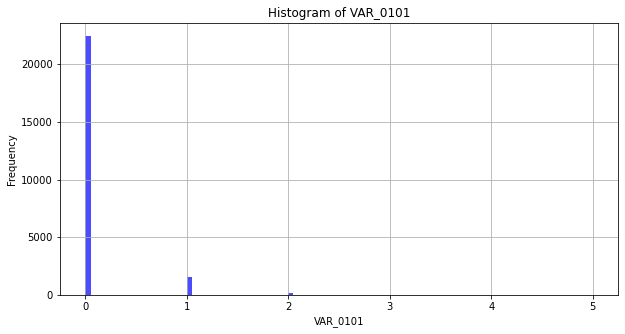

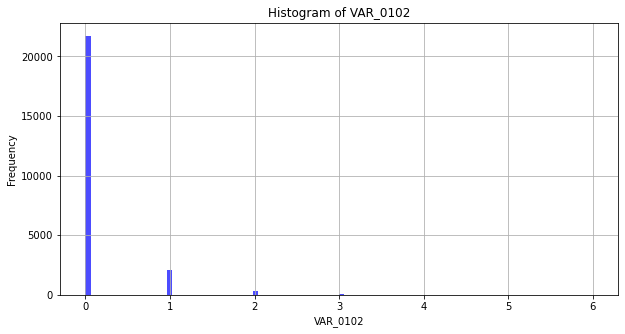

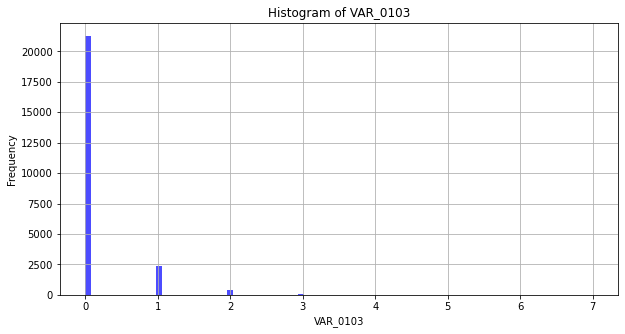

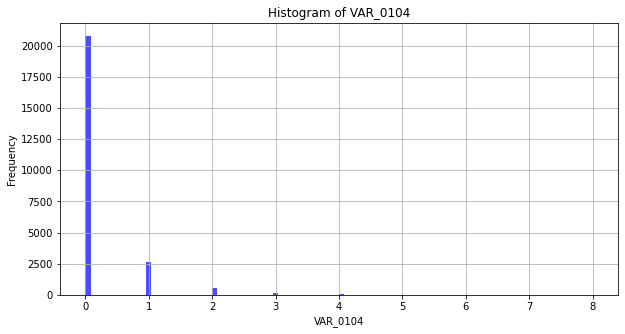

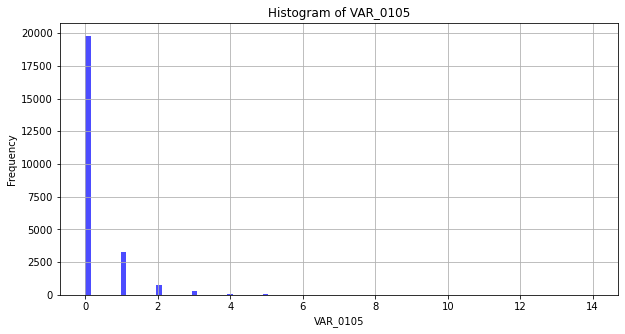

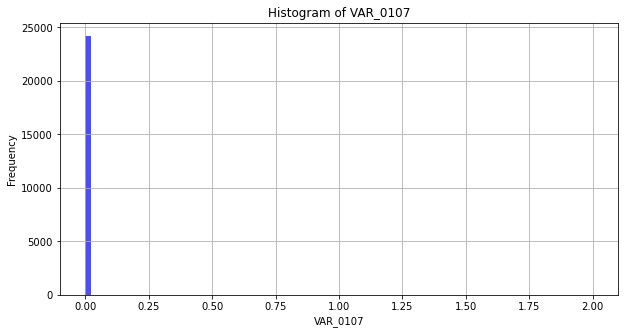

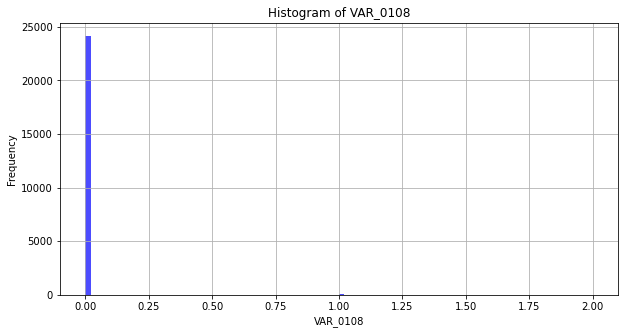

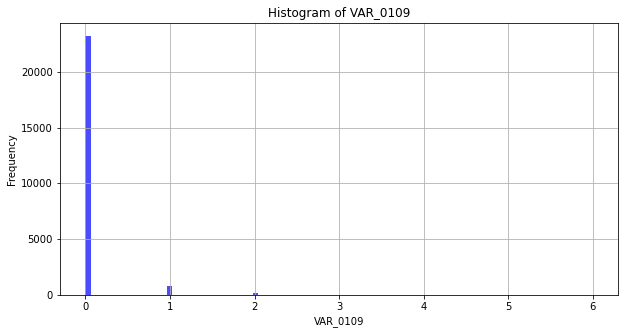

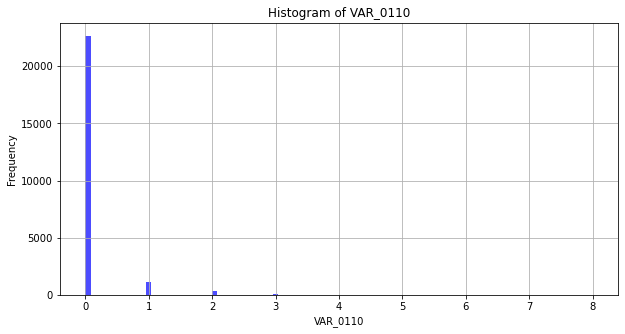

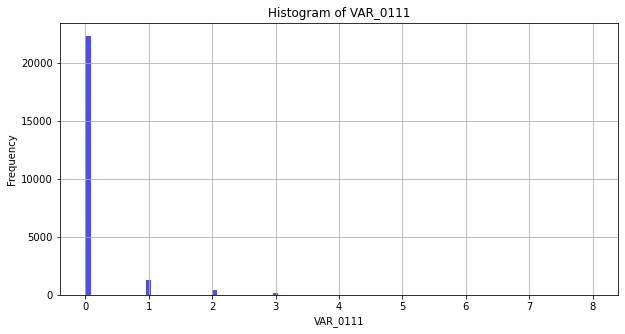

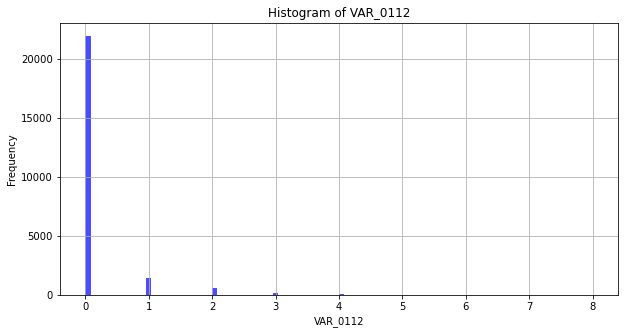

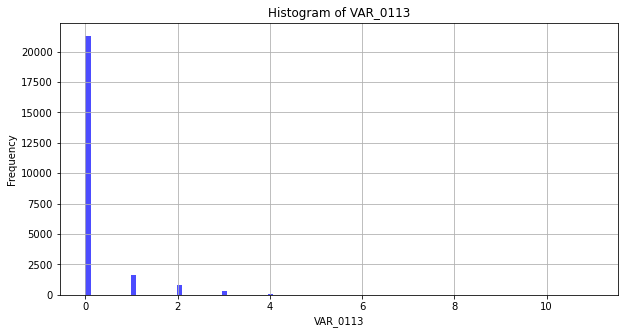

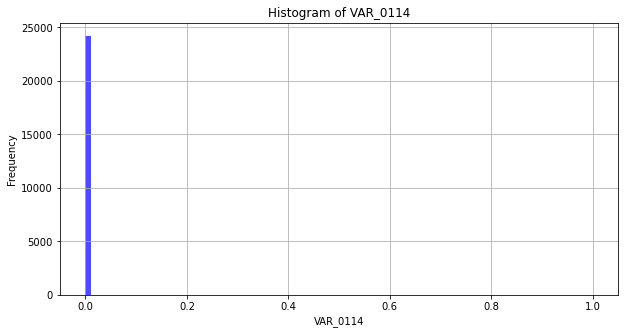

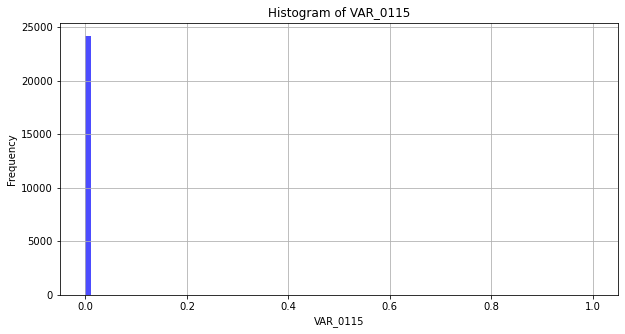

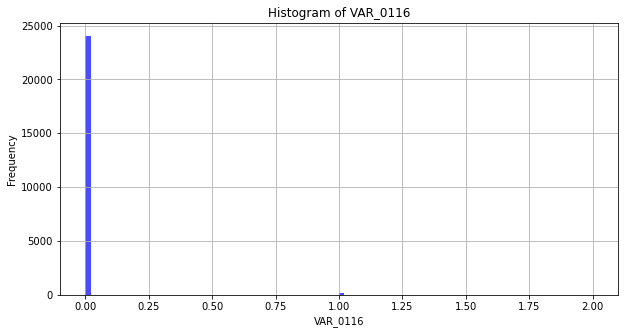

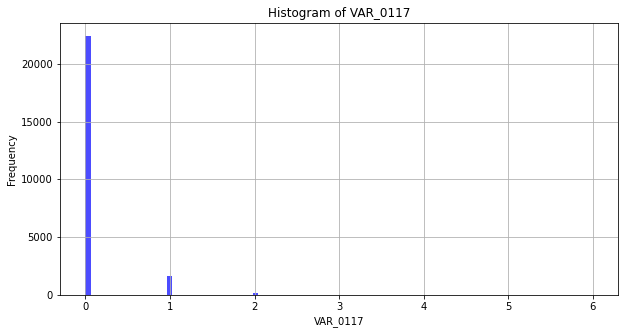

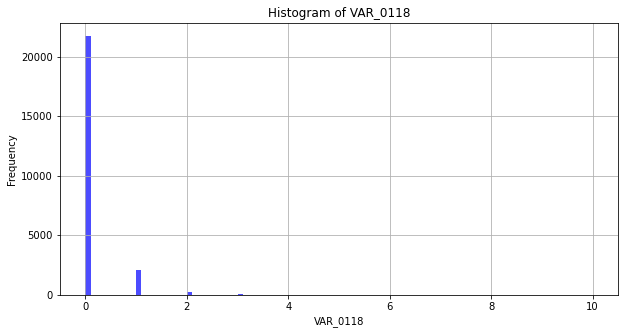

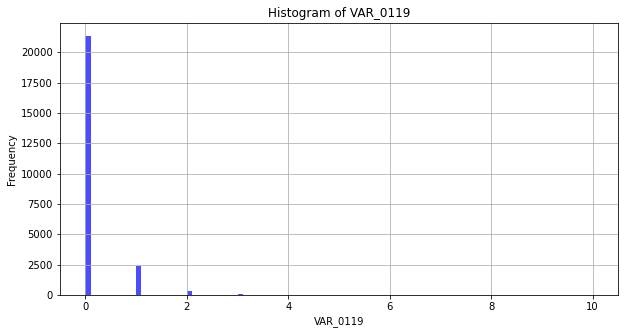

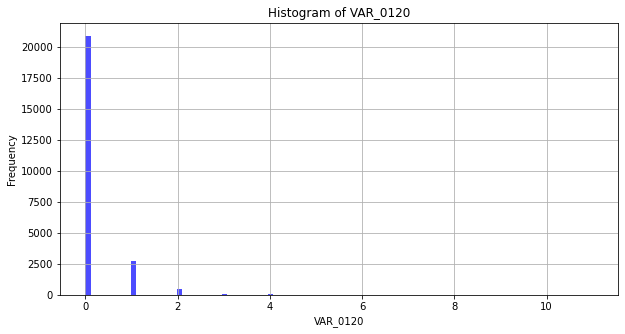

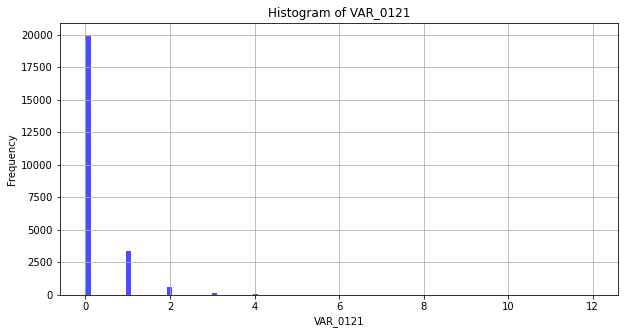

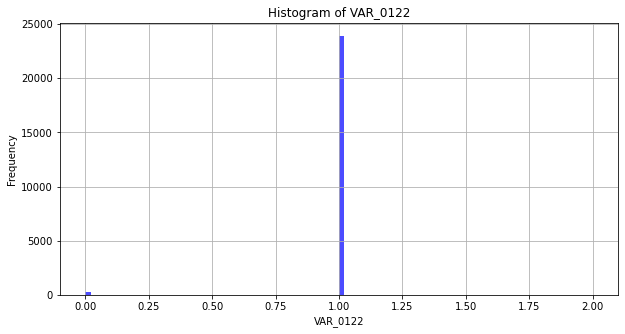

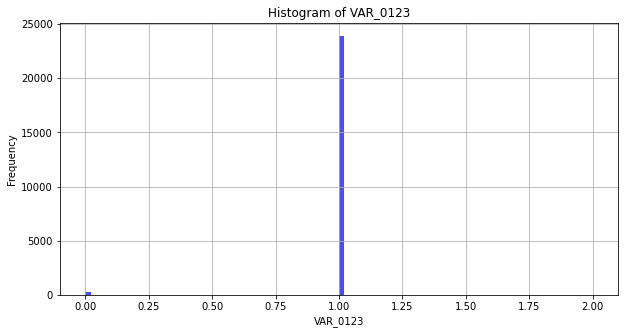

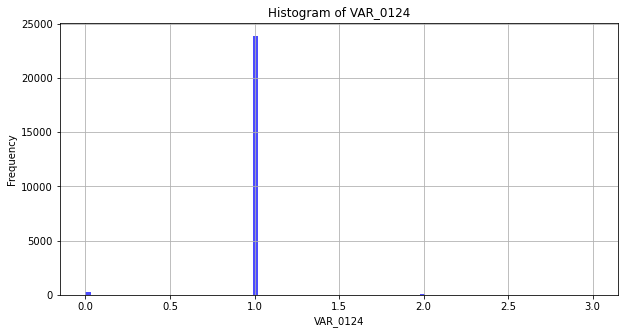

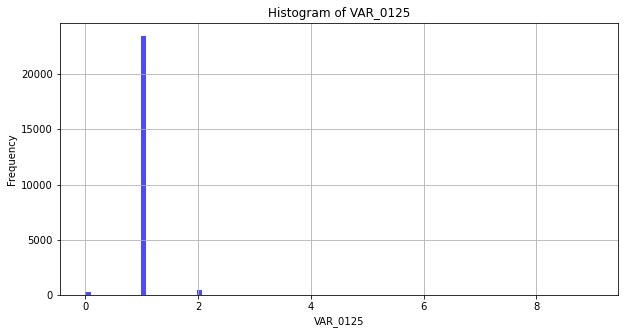

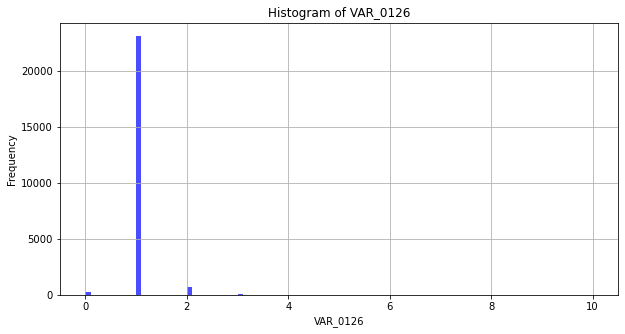

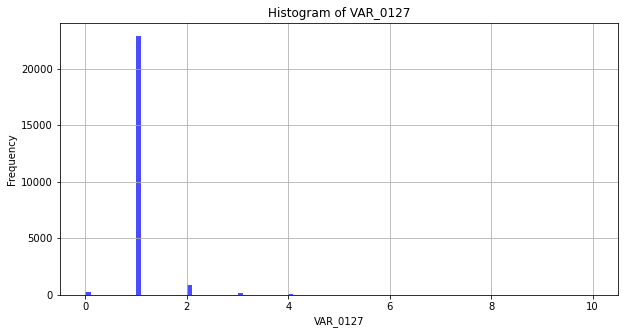

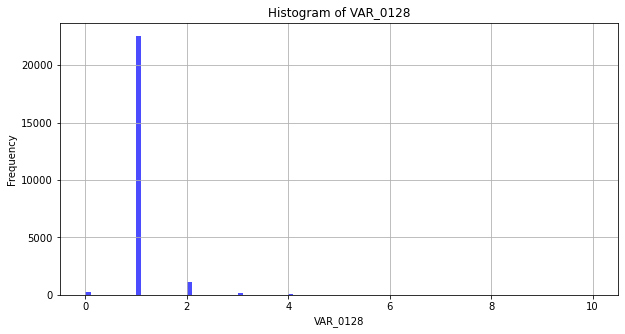

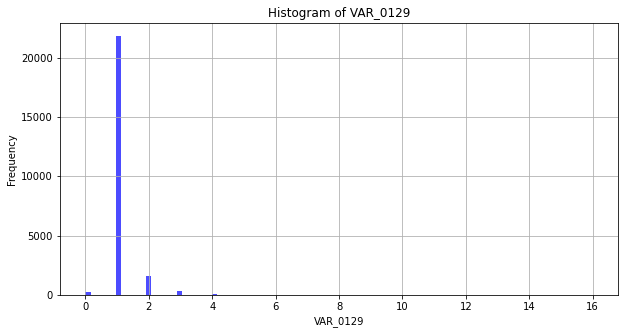

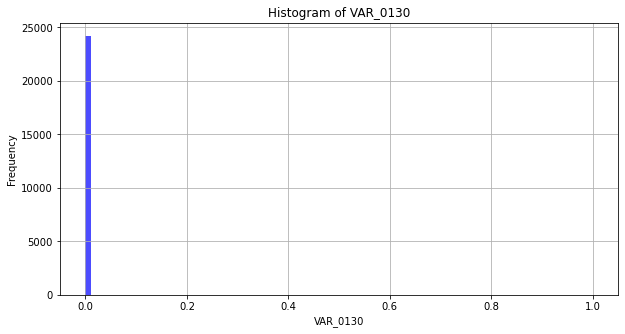

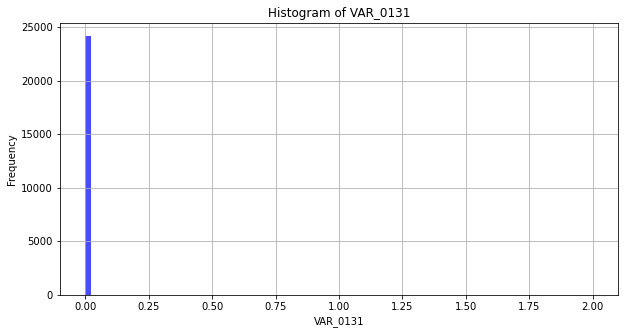

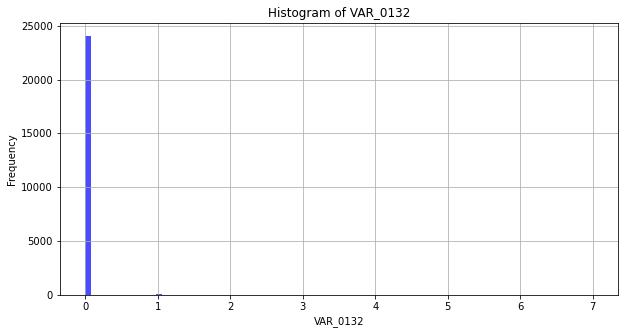

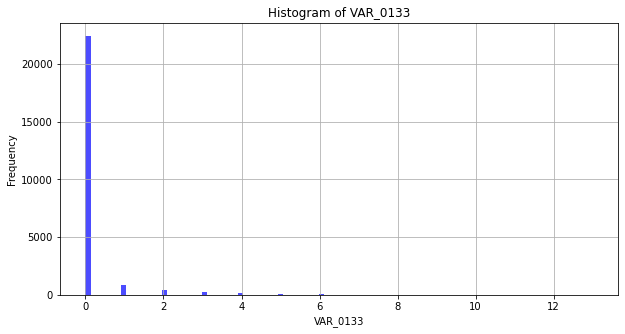

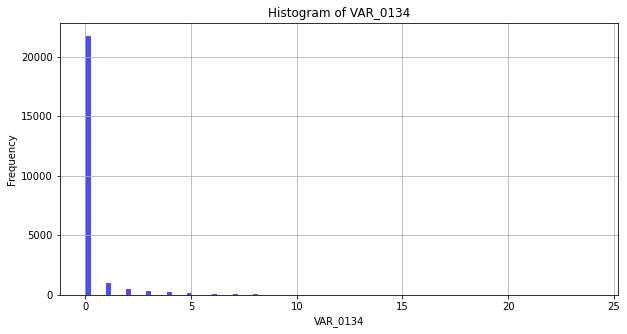

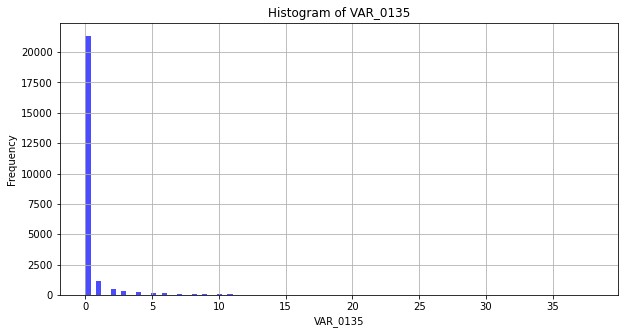

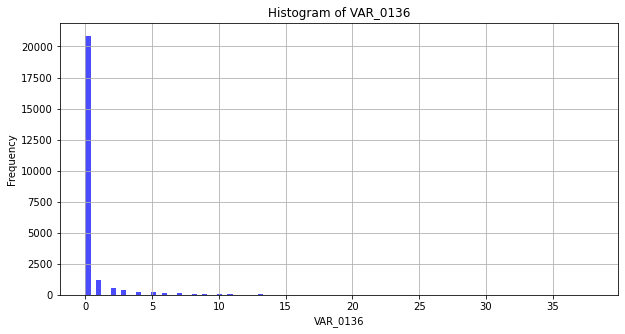

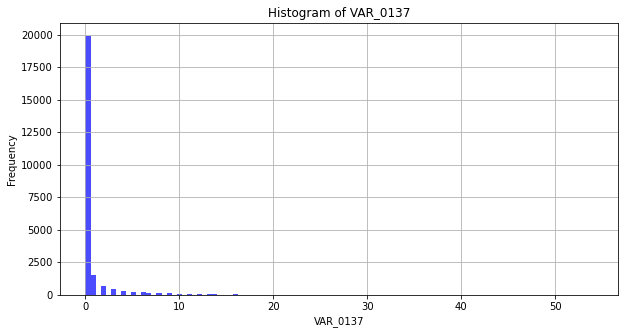

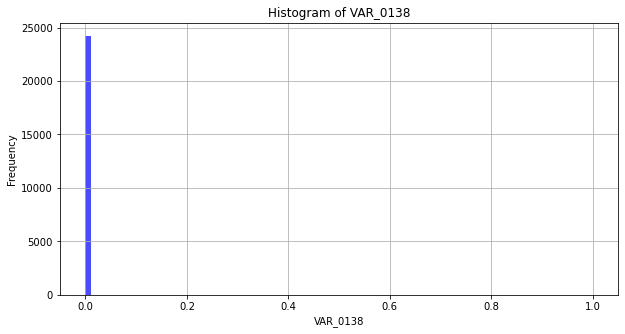

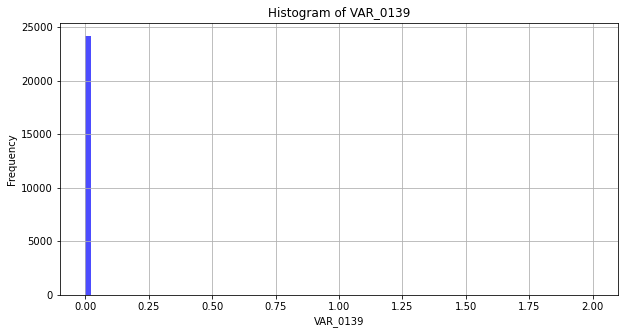

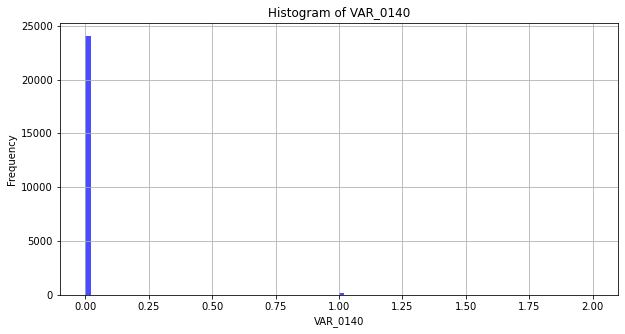

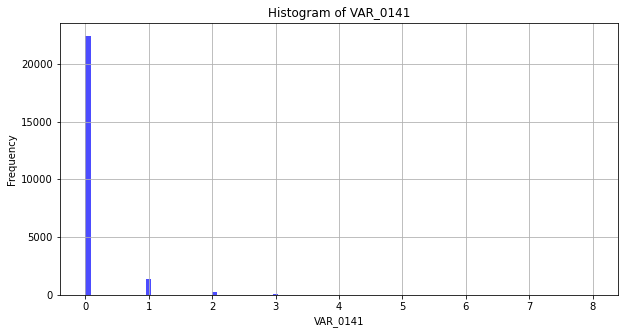

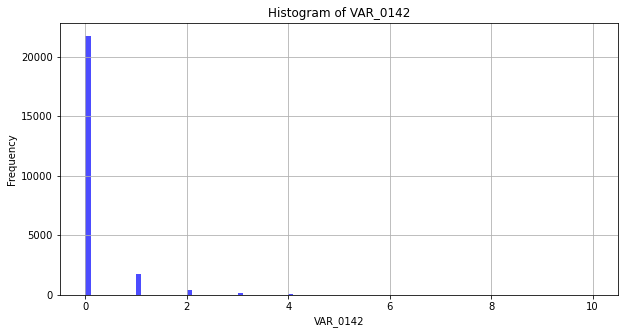

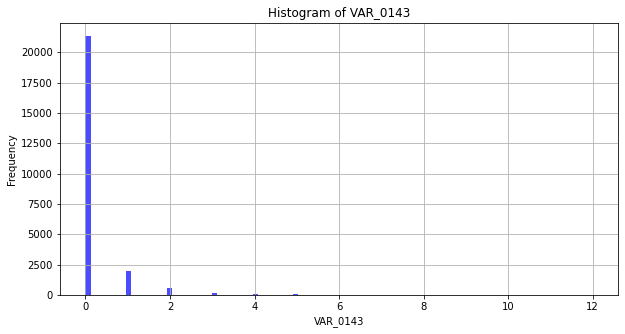

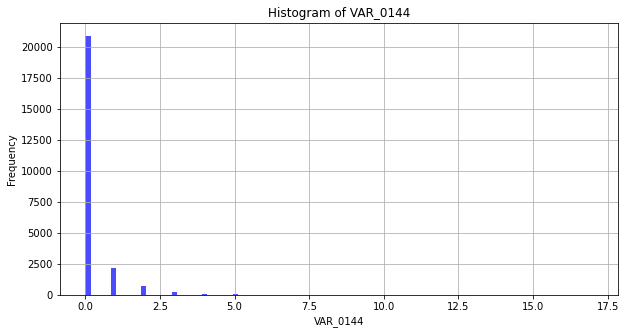

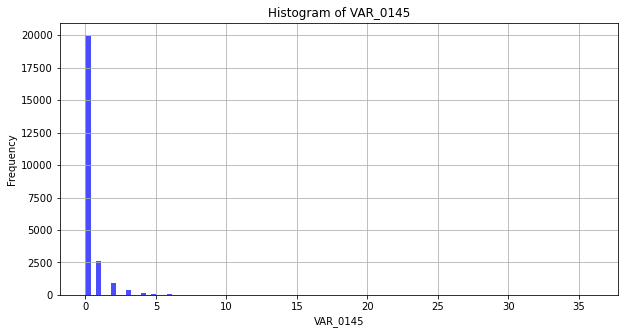

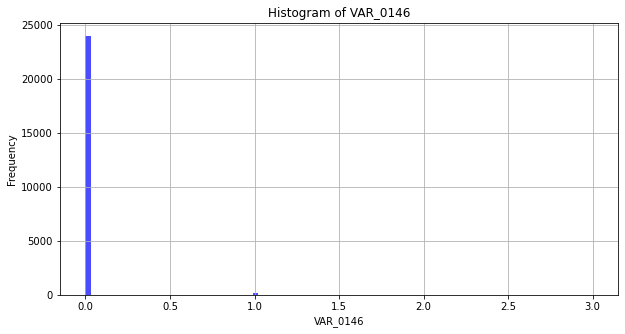

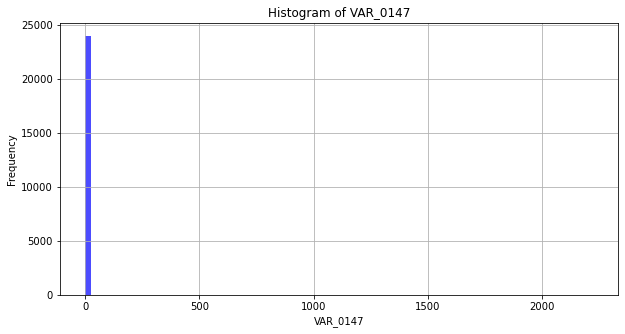

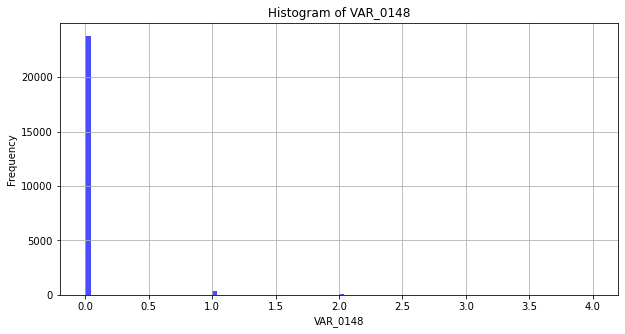

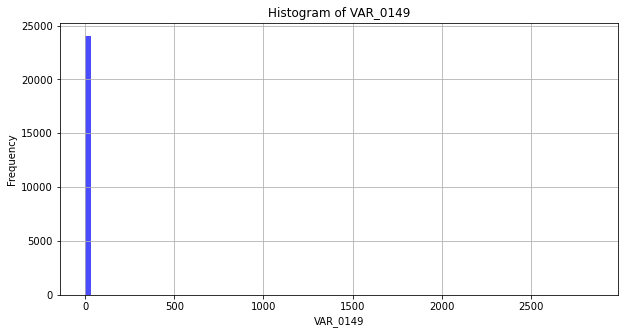

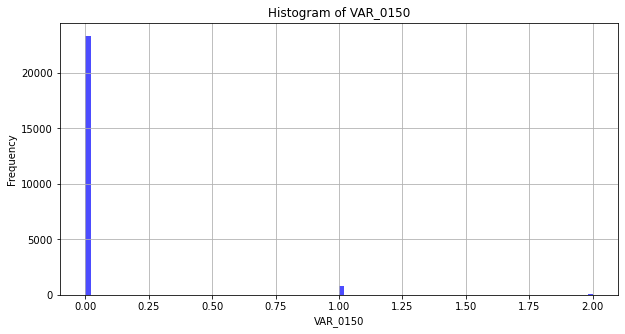

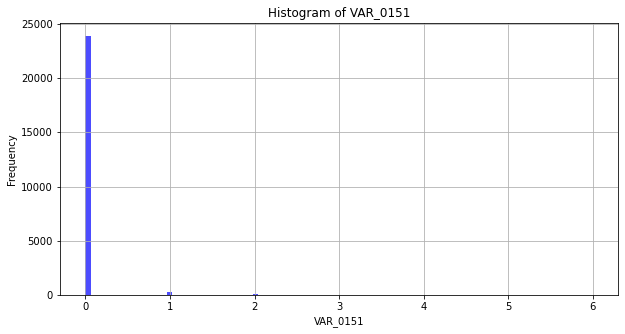

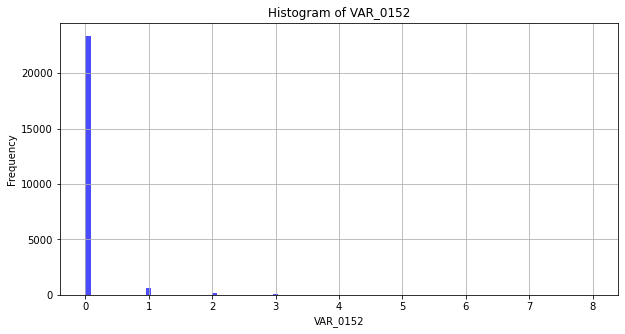

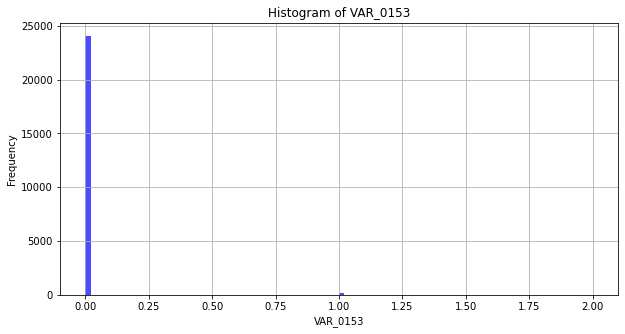

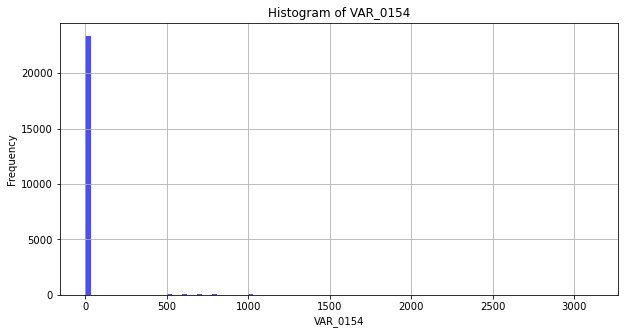

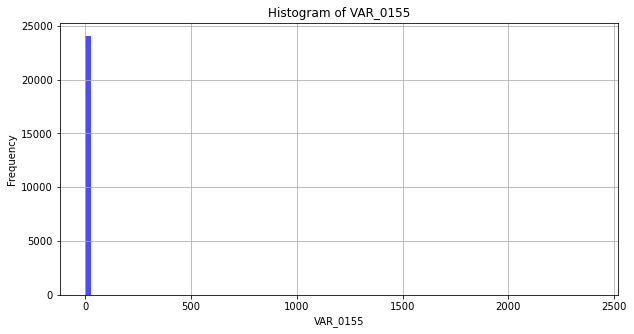

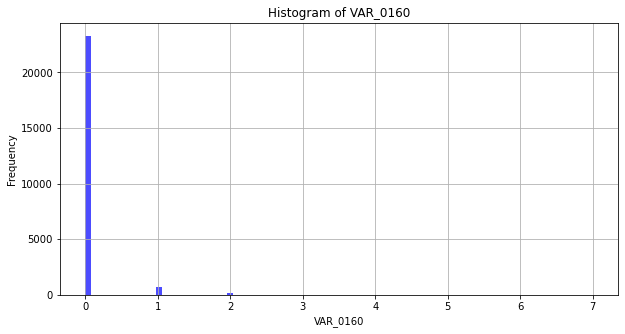

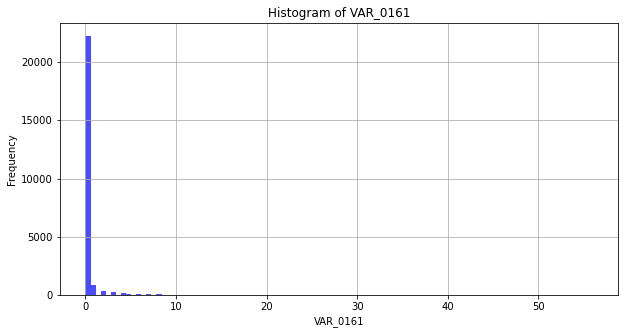

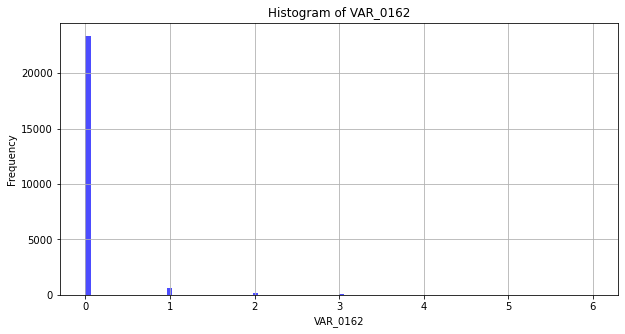

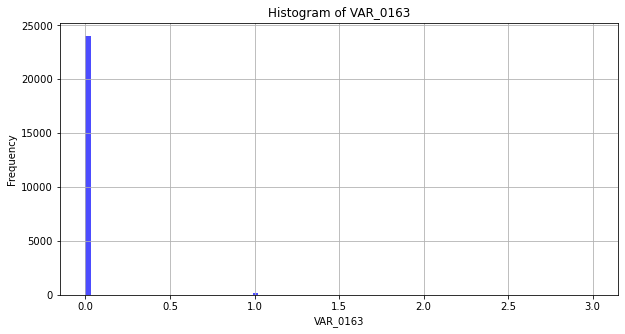

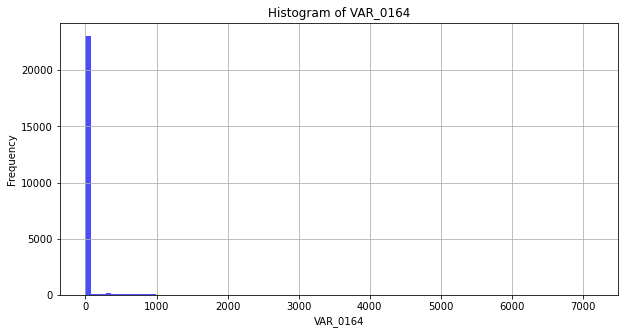

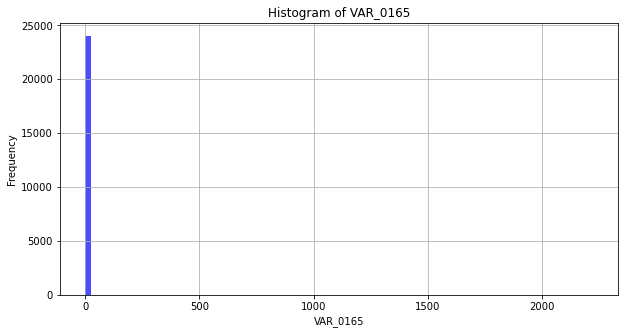

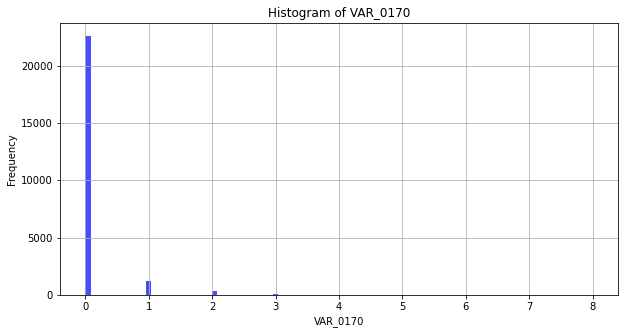

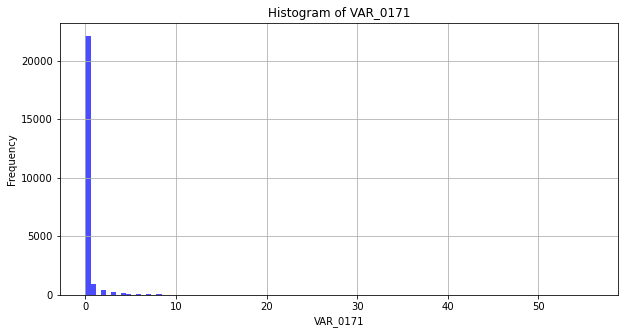

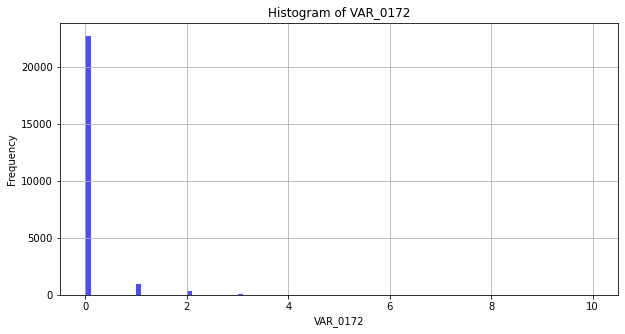

In [ ]:
num_col=[col for col in imputed_ck.select_dtypes(include=np.number).columns if col not in ['ID','target']]

# histograms for numerical columns
for col in num_col:
    plt.figure(figsize=(10, 5))
    plt.hist(imputed_ck[col], bins=100, color='blue', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [ ]:
n_unique=dict()

for col in imputed_ck.columns:
    try:
        n_unique[col]= np.unique(imputed_ck[col])
        print(col,len(n_unique[col]))
    except:
        n_unique[col]=None

In [ ]:
n_unique["VAR_0063"]

In [ ]:
plt.hist(imputed_ck["VAR_0017"],bins=50)

Initially assumed that numerical columns with fewer than 10 unique values may be survey answers on something like a likert scale. Upon a closer look, it is still possible to convert those values to categorical however it may lead to losing ordinal info or make it harder on the model.

## 4. Initial Data Visualization
The data will be visualized based on it's dtype. This is the first round of feature selection, as well as visualizing the data to decide standardizing techniques and outliers.

In [ ]:
# Extract only the categorical columns
max_values = 500
categorical_cols = [col for col in imputed_ck.select_dtypes(include=['object']).columns if prepped_ck[col].nunique() <= max_values]

# Define the target column name
target_col = 'target' 

# Filter the DataFrame for each class
df_0 = imputed_ck[imputed_ck[target_col] == 0] 
df_1 = imputed_ck[imputed_ck[target_col] == 1]

# number of subplots
n = len(categorical_cols)
n_cols = 2
n_rows = math.ceil(n/n_cols)

# Create a grid of box plots for categorical columns for each class
plt.figure(figsize=(15, 30))
for i, col in enumerate(categorical_cols, 1):
    if col in time_col:
        continue # skip time cols
        
    plt.subplot(n_rows, n_cols, i)  # Adjust the subplot layout based on the number of categorical columns
    sns.countplot(data = imputed_ck, x = target_col, hue = col)
    plt.title(f'Histogram of {col}')
    plt.xticks(rotation=45)
    plt.legend()
    
plt.legend(['0', '1'], loc='upper right', bbox_to_anchor=(1.1, 1))

plt.tight_layout(pad=2.0)
plt.show()

Unsure of what feature VAR_0342 is. Includes abbreviations for things I can't decipher, so I can't alter it. The feature doesn't seem to have much predictive power so will opt to drop it.

#### 1. Feature Selection
VAR_0005, VAR_0232, VAR_0237 ratio between the two targets identifies it as a potential feature for the model

Decided to drop cities (VAR_0200) and encode states (VAR_0237, VAR_0237) with the techniques stated in "Encoding Categorical Variables"

In [ ]:
def ks_test_statistics(df, target_col='target',display=5):
    exclude = ['ID', target_col]
    col = [col for col in df.columns if col not in exclude and np.issubdtype(df[col].dtype, np.number)]
    
    # Divide the data into separate dfs for the two categories
    df_0 = df[df[target_col] == 0]
    df_1 = df[df[target_col] == 1]
    
    print("Number of category 0:", df_0.shape[0])
    print("Number of category 1:", df_1.shape[0])
    
    count=0
    for column in col:
        if count >= display:
            break
        KS_test = scipy.stats.kstest(df_0[column], df_1[column]).statistic
        KS_test_str = "{KS:.3f}".format(KS=KS_test)
        print(f'{column} KS Distribution Similarity Test: {KS_test_str}')
        count += 1
        
ks_test_statistics(imputed_ck)

In [ ]:
def plot_histograms(df, target_col='target', logscale=False):
    exclude = ['ID', target_col]
    col = [col for col in df.columns if col not in exclude and np.issubdtype(df[col].dtype, np.number)]
    
    # Divide the data into separate dfs for the two categories
    df_0 = df[df[target_col] == 0]
    df_1 = df[df[target_col] == 1]
    
    for column in col:
        plt.figure(figsize=(10, 5))
        plt.title(f'Histogram of {column}')
        if logscale:
            plt.yscale("log")
        plt.hist(df_0[column], bins=100, histtype="step", color="red", label="0", density=True, stacked=True)
        plt.hist(df_1[column], bins=100, histtype="step", color="blue", label="1", density=True, stacked=True)
        plt.legend()
        plt.xlabel(column)
        
        plt.show()

plot_histograms(imputed_ck)

Many features are right-skewed and/or uni-modal. Too many features to manually input.

In [ ]:
def top_ks(df,target_col='target',top_n=100):
    exclude=['ID',target_col]
    num_col=[col for col in df.columns if col not in exclude and np.issubdtype(df[col].dtype, np.number)]
    
    df_0 = df[df[target_col] == 0]
    df_1 = df[df[target_col] == 1]
    
    ks_results=[]
    
    for column in num_col:
        ks_test=scipy.stats.kstest(df_0[column], df_1[column]).statistic
        ks_results.append((column,round(ks_test,3)))
      
    # convert to df
    ks_df = pd.DataFrame(ks_results, columns=['Feature', 'KS_Statistic'])
    
    # sort in descending order
    ks_df = ks_df.sort_values(by='KS_Statistic', ascending=False)
    
    # display top_n features
    top_ks_df = ks_df.head(top_n)
    
    return top_ks_df

top_feat=top_ks(imputed_ck,target_col='target',top_n=100)
print(top_feat)

#### 2. Feature Selection

top 5 features (VAR_0006, VAR_0013, VAR_0007, VAR_0014, VAR_0071)